# Our Motivation

In [a previous notebook](https://colab.research.google.com/drive/1yIEU12CJY7YRvNdj1np24ih_reA3ltt9?usp=sharing) I demonstrated how to generate a cleaned/scraped text from a given domain. But we can't simply jam this dataset into a model to train it. First we need to mold the datatset into a format that our model can understand. 

As a reminder, the end goal of these series of notebooks is to allow you to produce and deploy a model which can perform extractive question-answering tasks on a specific domain. Simply put, we want to be able to pose a question related to a document or set of documents and find a passage or multiple passages within the document(s) which best answer our question. 

Consider the following excerpt from Aesop's timeless [*The Tortoise and the Hare*](http://read.gov/aesop/025.html): 



> "...The Hare was much amused at the idea of running a race with the Tortoise, but for the fun of the thing he agreed. So the Fox, who had consented to act as judge, marked the distance and started the runners off..."

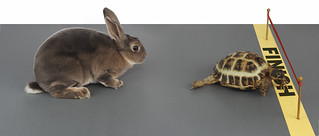

Of course, this isn't our *entire* document, but if we were to use this as the context for our question and pose the question "Who was the judge?", our model should hopefully return an excerpt containing the phrase "the Fox". 

It's one thing for a model to perform well with a context like a short story; after all, most QA models have been trained from sources like Wikipedia articles, so they're used to comprehending documents where the information is written in paragraphs with complete sentences. 

But what if we wanted our model to understand text from a list of course descriptions, like the screenshot of the FSU CS department website? 

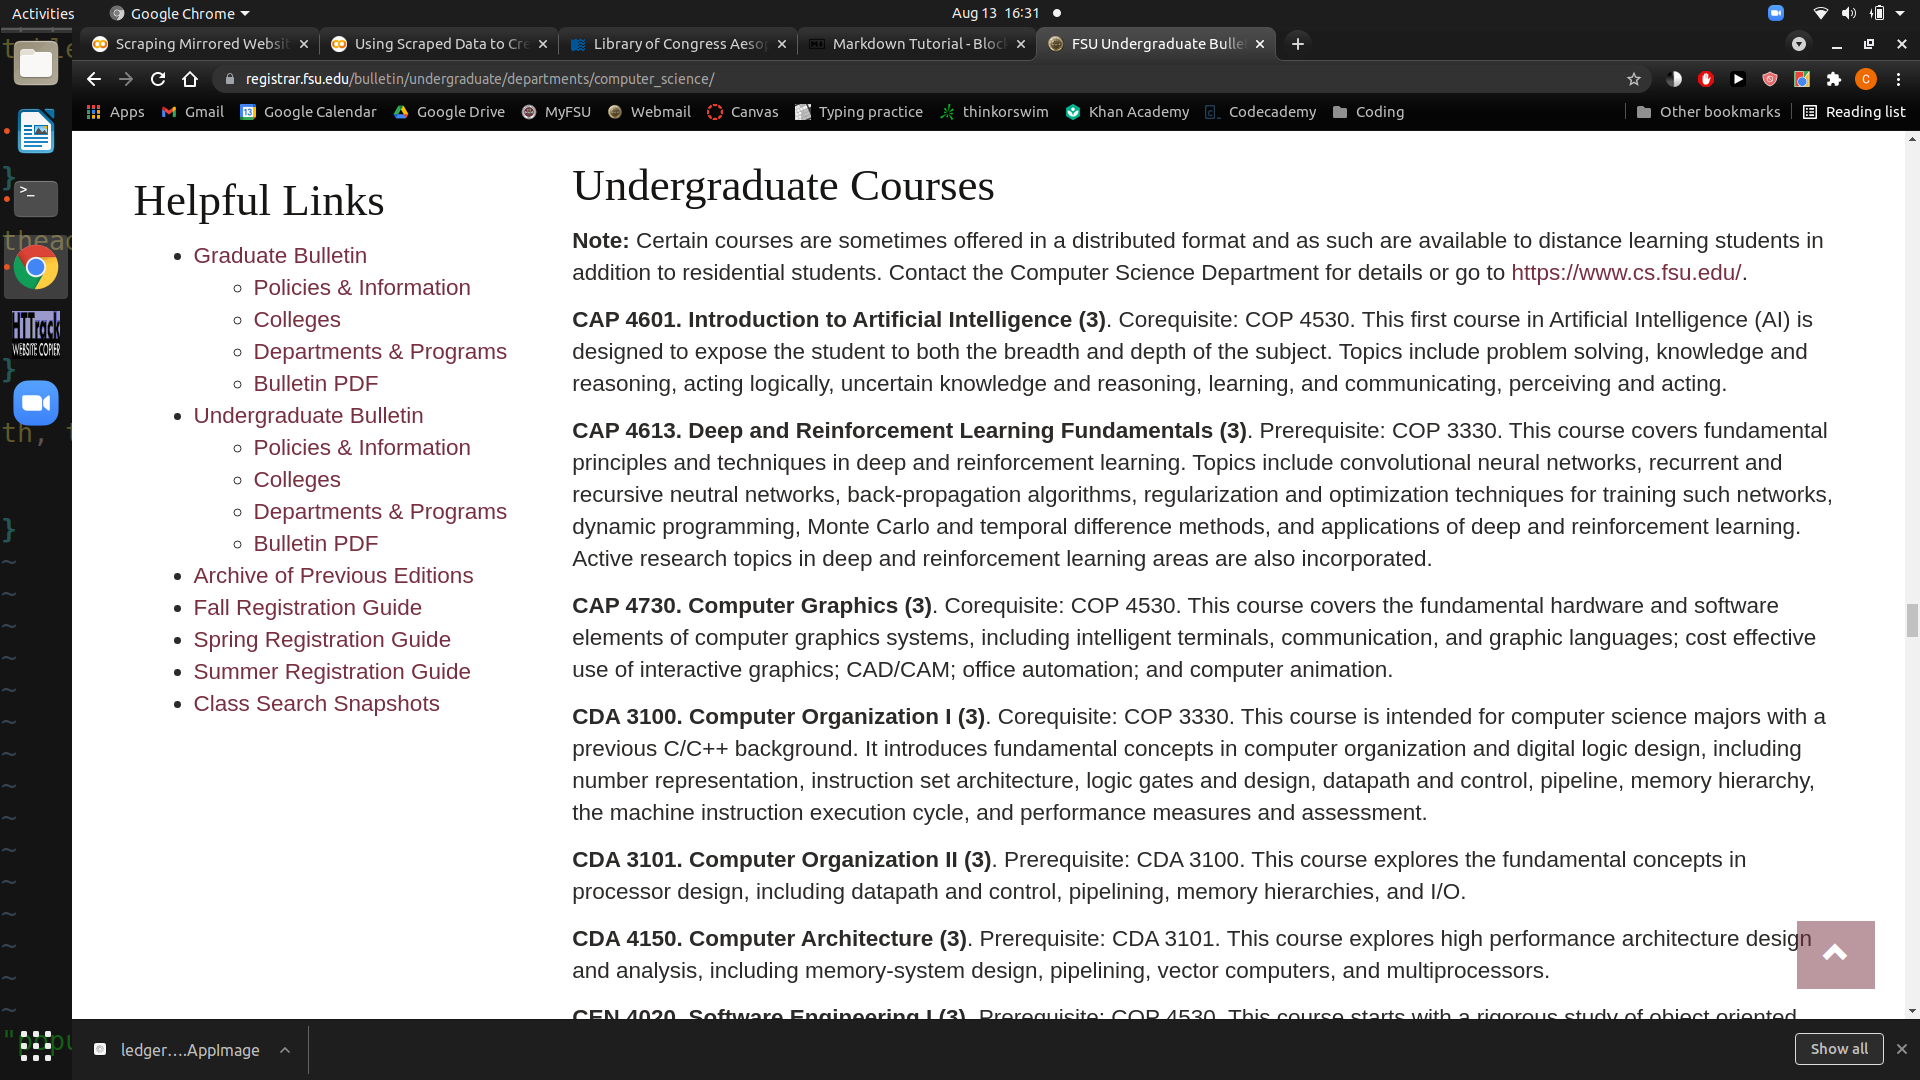

If a model attempting to "ask this site" something like "What is CAP 4610" would probably not perform well; and regardless of how well it would or wouldn't perform, we can provably *improve* a model's performance by fine-tuning a given model on a specific domain. Just take my word for it for now, and we will demonstrate the improvements later on. 

Hopefully you're convinced (or at least willing to take my word) that training a model on a specific domain will improve predictions gathered from that domain. So what do we do next? 

 # SQuAD

 SQuAD, or the [Stanford Question-Answering Dataset](https://rajpurkar.github.io/SQuAD-explorer/), is one of the most widely-known datasets developed for training NLP models to perform extractive question answering. For the sake of time, I won't go into the nitty-gritty details yet. But we should briefly discuss the general compontents of a SQuAD entry.

 ## Creating a SQuAD Entry 

 Returning to our example from *The Tortoise & the Hare*, if we were to create a SQUaD type entry from the passage, we can intuitvely generate questions and a corresponding selection which best answers our question. 

 ### Examples 
 
 **Context:**

 > "...The Hare was much amused at the idea of running a race with the Tortoise, but for the fun of the thing he agreed. So the Fox, who had consented to act as judge, marked the distance and started the runners off..."

 **Question-Answer Pairs** 

 * Q: Who is the judge? 
 * * A: "..the Fox..."
 * Q: Why does the hare agree to race? 
 * * A: "...for the fun of the thing..." 
 * Q: Who did the hare race?
 * * A: "...the Tortoise..." 

 Intuitively, it seems pretty easy, but the model needs to know where the answer starts, where it ends, how long the passage is, how long the context is, etc. To manually determine all these variables and format them would take incredibly long. Luckily, [Deepset AI](https://www.deepset.ai/) has created a tool that can make this process much, *much* easier, aptly named the [Annotation Tool](annotate.deepset.ai).

# Haystack Annotation 

